<a href="https://colab.research.google.com/github/ahforoughi/ENSF619-SE_for_ML_Apps/blob/main/ENSF619_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration



In [2]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Descriptive statistics
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# print concise summary of dataset
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Find number of null values in each coloumn
data.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# count the number of each species
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
# map the Species to 0, 1, 3 so we could use them in machine learnign models
# and data visualization

data['Species'] = data['Species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2,
})

In [9]:
data.head(-5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
140,141,6.7,3.1,5.6,2.4,2
141,142,6.9,3.1,5.1,2.3,2
142,143,5.8,2.7,5.1,1.9,2
143,144,6.8,3.2,5.9,2.3,2


Text(0, 0.5, 'Petal width')

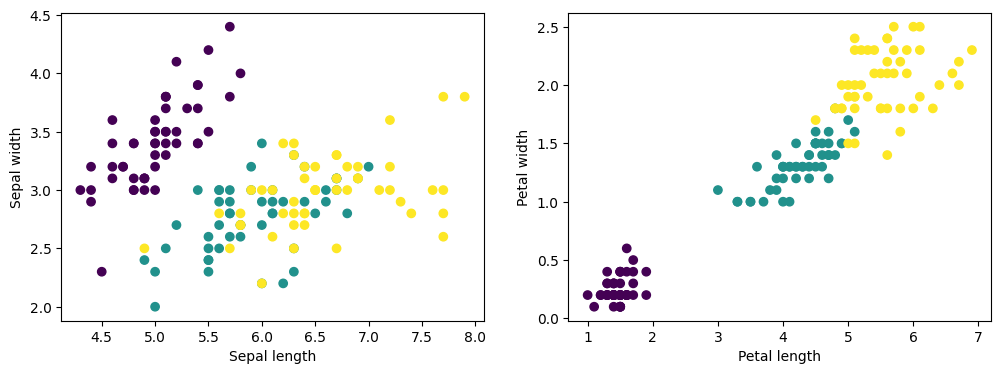

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.scatter(data["SepalLengthCm"], data["SepalWidthCm"], c=data["Species"])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.subplot(1,2,2)
plt.scatter(data["PetalLengthCm"], data["PetalWidthCm"], c=data["Species"])
plt.xlabel('Petal length')
plt.ylabel('Petal width')


<Axes: >

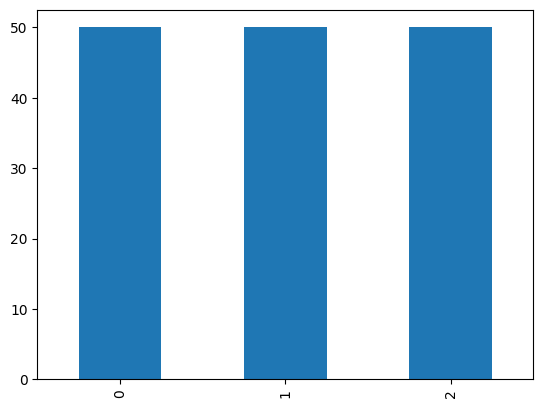

In [22]:
# Number of each category in species coloumn
species = data['Species'].value_counts()
species.plot(kind='bar')

<Axes: >

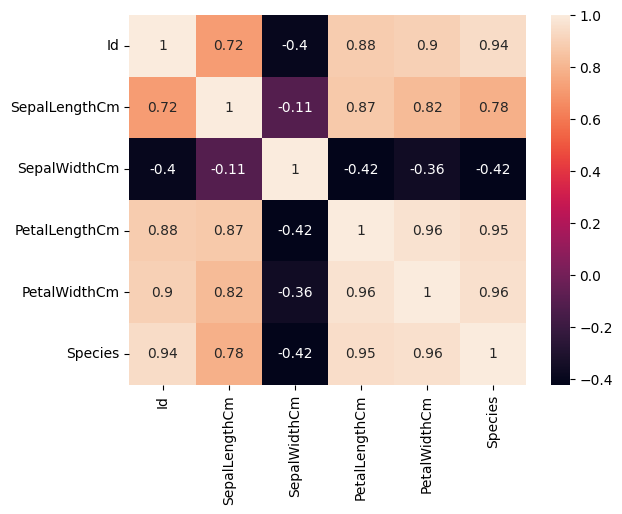

In [12]:
# the heatmap of correlation
# The color of each cell represents the strength and direction of the correlation,
# with darker colors indicating stronger correlations.
sns.heatmap(data.corr(), annot=True)

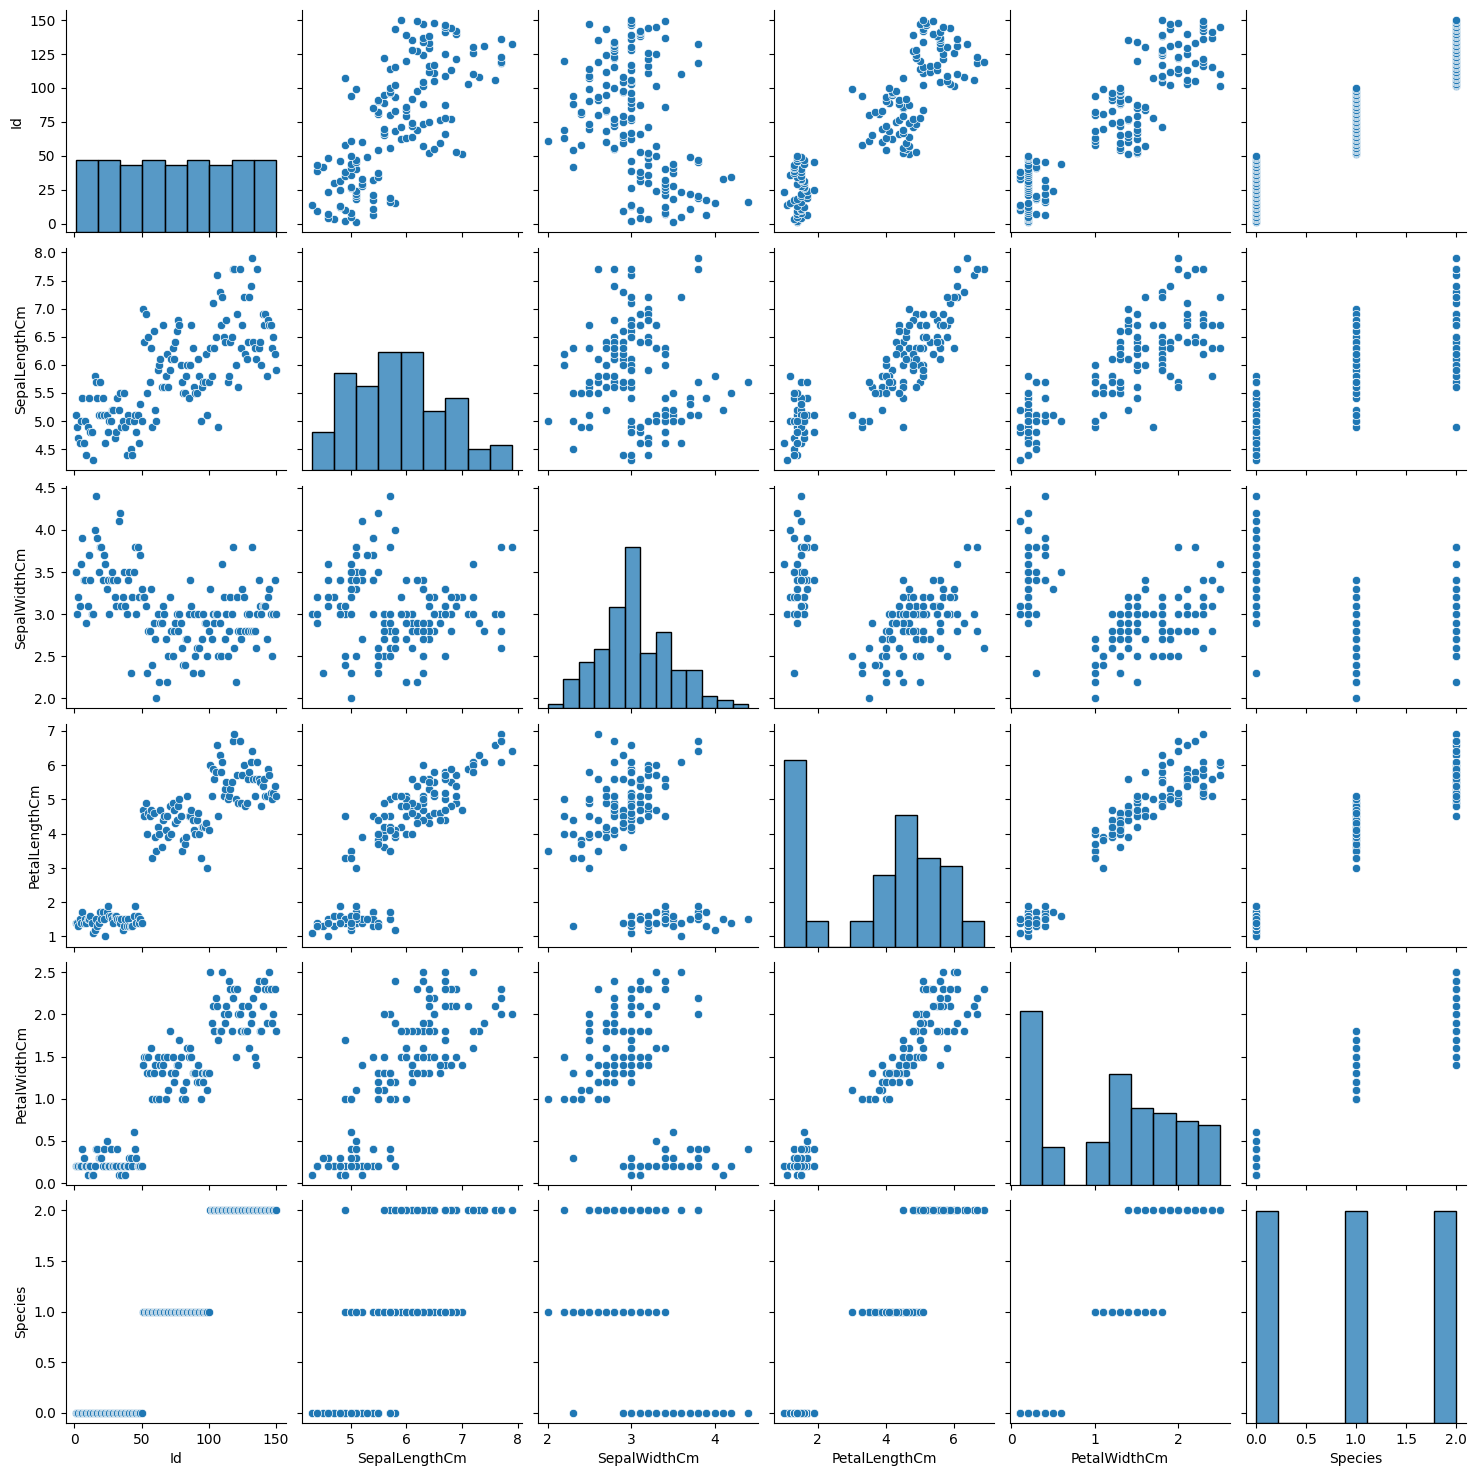

In [13]:
# To plot multiple pairwise bivariate distributions in the dataset
sns.pairplot(data, kind='scatter')

# Model Training

In [14]:
# seperate the train data and the target variable
X = data.drop('Species', axis=1)
y = data['Species']

In [15]:
# spliting train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [16]:
# create a desision tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=100)
dt_model = model.fit(X_train, y_train)

<Axes: >

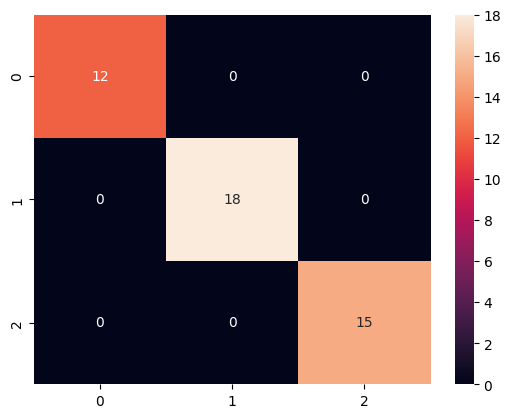

In [32]:
# make a prediction
predicts = dt_model.predict(X_test)

# confusion matrix
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(predicts, y_test)
sns.heatmap(cm1, annot=True)


As you could see, 12, 18 and 15 rows are classified correctly to species 0, 1 and 2 respectively.



In [25]:
# Check the accuracy of the model
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(predicts, y_test)
print('The model\'s accuracy is: ', model_accuracy * 100)

The model's accuracy is:  100.0


# Build the AdaBoost model

The AdaBoost model will combine multiple weak classifiers to increase the accuracy of classifiers.

AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier.



In [28]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# Create adaboost classifer object
svc=SVC(probability=True, kernel='linear')

# n_estimators is the number of models to iteratively train.
# base_estimator is the learning algorithm to use to train the weak models.
ada_model_1 =AdaBoostClassifier(n_estimators=30, base_estimator=svc, learning_rate=0.5)

# Train Adaboost Classifer
model_1 = ada_model_1.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model_1.predict(X_test)

print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred) * 100)


AdaBoost Classifier Model Accuracy: 100.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


<Axes: >

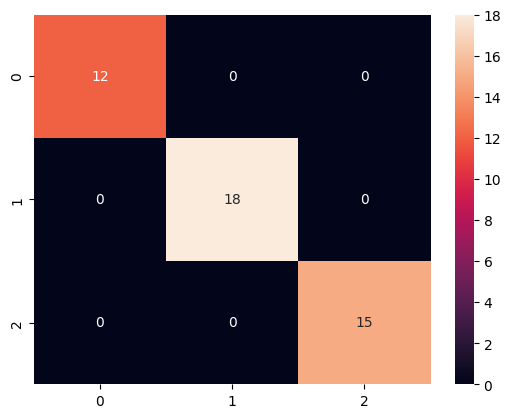

In [33]:
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True)
